<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [6]:
#Calculamos el numero total de la población "n"
Barcelona['number_of_reviews']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: number_of_reviews
Non-Null Count  Dtype
--------------  -----
18927 non-null  int64
dtypes: int64(1)
memory usage: 148.0 KB


In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['number_of_reviews'].max()
Min=Barcelona['number_of_reviews'].min()
Limites= [Min, Max]
Limites

[0, 1624]

In [8]:
#Calculamos el rango R
R=Max-Min
R

1624

In [9]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

103.57288406112293

**Creación de Categorias a partir de clases**

In [11]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 1624.1, 16)
intervalos

array([-1.00000e-01,  1.08180e+02,  2.16460e+02,  3.24740e+02,
        4.33020e+02,  5.41300e+02,  6.49580e+02,  7.57860e+02,
        8.66140e+02,  9.74420e+02,  1.08270e+03,  1.19098e+03,
        1.29926e+03,  1.40754e+03,  1.51582e+03,  1.62410e+03])

In [12]:
#Creamos las categorías 
categorias= ["Categoría1 (0-1 number_of_reviews)", "Categoría2 (1.1-2.1 number_of_reviews)","Categoría3 (2.2-3.2 number_of_reviews)", "Categoría4 (3.3-4.3 number_of_reviews)",
             "Categoría5 (4.4-5.4 number_of_reviews)", "Categoría6 (5.5-6.4 number_of_reviews)","Categoría7 (6.5-7.5 number_of_reviews)", "Categoría8 (7.6-8.6 number_of_reviews)", "Categoría9 (8.7-9.7 number_of_reviews)", "Categoría10 (9.8-1 number_of_reviews)","Categoría11 (1.1-1.19 number_of_reviews)", "Categoría12 (1.2-1.29 number_of_reviews)",
             "Categoría13 (1.3-1.40 number_of_reviews)", "Categoría14 (1.41-1.51 number_of_reviews)", "Categoría15 (1.52-1.62 number_of_reviews)"
             ]

In [13]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['number_of_reviews']=pd.cut(x= Barcelona['number_of_reviews'], bins=intervalos, labels= categorias)
Barcelona['number_of_reviews']

0               Categoría1 (0-1 number_of_reviews)
1               Categoría1 (0-1 number_of_reviews)
2           Categoría2 (1.1-2.1 number_of_reviews)
3               Categoría1 (0-1 number_of_reviews)
4               Categoría1 (0-1 number_of_reviews)
5               Categoría1 (0-1 number_of_reviews)
6           Categoría3 (2.2-3.2 number_of_reviews)
7           Categoría2 (1.1-2.1 number_of_reviews)
8           Categoría5 (4.4-5.4 number_of_reviews)
9           Categoría6 (5.5-6.4 number_of_reviews)
10              Categoría1 (0-1 number_of_reviews)
11              Categoría1 (0-1 number_of_reviews)
12          Categoría3 (2.2-3.2 number_of_reviews)
13              Categoría1 (0-1 number_of_reviews)
14          Categoría5 (4.4-5.4 number_of_reviews)
15          Categoría2 (1.1-2.1 number_of_reviews)
16              Categoría1 (0-1 number_of_reviews)
17          Categoría7 (6.5-7.5 number_of_reviews)
18              Categoría1 (0-1 number_of_reviews)
19          Categoría3 (2.2-3.2

In [14]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['number_of_reviews'].value_counts().reset_index()
Tabla_freq

number_of_reviews  count
0          Categoría1 (0-1 number_of_reviews)  16067
1      Categoría2 (1.1-2.1 number_of_reviews)   1560
2      Categoría3 (2.2-3.2 number_of_reviews)    679
3      Categoría4 (3.3-4.3 number_of_reviews)    316
4      Categoría5 (4.4-5.4 number_of_reviews)    162
5      Categoría6 (5.5-6.4 number_of_reviews)     80
6      Categoría7 (6.5-7.5 number_of_reviews)     30
7      Categoría9 (8.7-9.7 number_of_reviews)     12
8      Categoría8 (7.6-8.6 number_of_reviews)      8
9       Categoría10 (9.8-1 number_of_reviews)      5
10   Categoría11 (1.1-1.19 number_of_reviews)      2
11   Categoría13 (1.3-1.40 number_of_reviews)      2
12  Categoría14 (1.41-1.51 number_of_reviews)      2
13   Categoría12 (1.2-1.29 number_of_reviews)      1
14  Categoría15 (1.52-1.62 number_of_reviews)      1

In [15]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

number_of_reviews  count
0          Categoría1 (0-1 number_of_reviews)  16067
1      Categoría2 (1.1-2.1 number_of_reviews)   1560
2      Categoría3 (2.2-3.2 number_of_reviews)    679
3      Categoría4 (3.3-4.3 number_of_reviews)    316
4      Categoría5 (4.4-5.4 number_of_reviews)    162
5      Categoría6 (5.5-6.4 number_of_reviews)     80
6      Categoría7 (6.5-7.5 number_of_reviews)     30
7      Categoría9 (8.7-9.7 number_of_reviews)     12
8      Categoría8 (7.6-8.6 number_of_reviews)      8
9       Categoría10 (9.8-1 number_of_reviews)      5
10   Categoría11 (1.1-1.19 number_of_reviews)      2
11   Categoría13 (1.3-1.40 number_of_reviews)      2
12  Categoría14 (1.41-1.51 number_of_reviews)      2
13   Categoría12 (1.2-1.29 number_of_reviews)      1
14  Categoría15 (1.52-1.62 number_of_reviews)      1

In [16]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('number_of_reviews')
Filtro_index

count
number_of_reviews                               
Categoría1 (0-1 number_of_reviews)         16067
Categoría2 (1.1-2.1 number_of_reviews)      1560
Categoría3 (2.2-3.2 number_of_reviews)       679
Categoría4 (3.3-4.3 number_of_reviews)       316
Categoría5 (4.4-5.4 number_of_reviews)       162
Categoría6 (5.5-6.4 number_of_reviews)        80
Categoría7 (6.5-7.5 number_of_reviews)        30
Categoría9 (8.7-9.7 number_of_reviews)        12
Categoría8 (7.6-8.6 number_of_reviews)         8
Categoría10 (9.8-1 number_of_reviews)          5
Categoría11 (1.1-1.19 number_of_reviews)       2
Categoría13 (1.3-1.40 number_of_reviews)       2
Categoría14 (1.41-1.51 number_of_reviews)      2
Categoría12 (1.2-1.29 number_of_reviews)       1
Categoría15 (1.52-1.62 number_of_reviews)      1

Text(0, 0.5, 'Frecuencia')

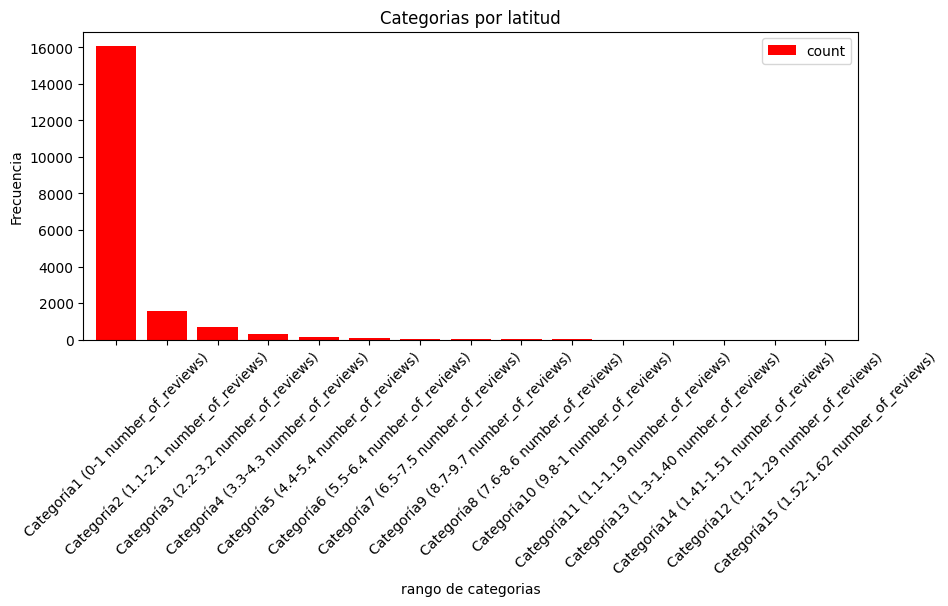

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')